<a href="https://colab.research.google.com/github/panstenos/Melanoma-Detection-using-CNNs/blob/main/Notebooks/Melanoma_Analysis_no_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Description**

Welcome! This dataset, comprising 13,900 meticulously curated images, is a valuable resource for advancing the field of dermatology and computer-aided diagnostics. Dive into the intricate world of melanoma, where every pixel holds the potential to redefine early detection.

### **Context**

Melanoma, a deadly form of skin cancer, demands prompt and accurate diagnosis. Leveraging state-of-the-art technology, this dataset empowers researchers and practitioners to develop robust machine-learning models capable of distinguishing between benign and malignant lesions. The images, uniformly sized at 224 x 224 pixels, offer a comprehensive view of melanoma's diverse manifestations.

### **Sources and Inspiration**

This dataset draws inspiration from the critical need for advanced diagnostic tools in dermatology. The images are compiled from diverse sources and showcase the intricate features that challenge traditional diagnostic methods. By sharing this dataset on Kaggle, we invite the global data science community to collaborate, innovate, and contribute towards developing reliable models for melanoma classification.

# Required Dependencies


In [19]:
import os

import numpy as np

# tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model
# models
from tensorflow.keras.applications.inception_v3 import InceptionV3

# plotting libraries
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img
from google.colab import files


# 1. Data Organization

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# %cd '/content/drive/MyDrive/Colab Notebooks/Melanoma Cancer Detection'
# !unzip data.zip

# 2. EDA

In [3]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/Melanoma Cancer Detection'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_benign_dir = os.path.join(train_dir, 'Benign')
train_malignant_dir = os.path.join(train_dir, 'Malignant')
test_benign_dir = os.path.join(test_dir, 'Benign')
test_malignant_dir = os.path.join(test_dir, 'Malignant')

print('{} Benign Train Images'.format(len(os.listdir(train_benign_dir))))
print('{} Malignant Train Images'.format(len(os.listdir(train_malignant_dir))))
print('{} Benign Test Images'.format(len(os.listdir(test_benign_dir))))
print('{} Malignant Test Images'.format(len(os.listdir(test_malignant_dir))))

6289 Benign Train Images
5590 Malignant Train Images
1000 Benign Test Images
1000 Malignant Test Images


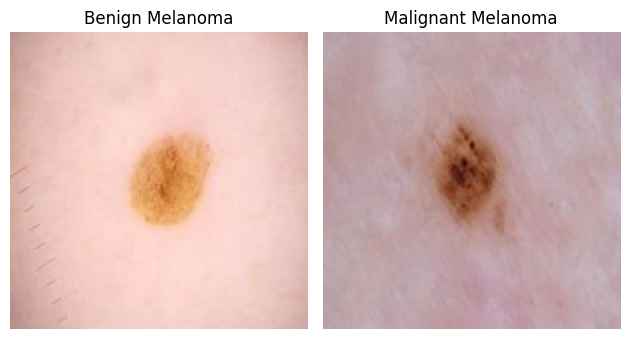

In [44]:
# Load the images
benign_image = load_img(os.path.join(train_benign_dir, os.listdir(train_benign_dir)[13]))
malignant_image = load_img(os.path.join(train_malignant_dir, os.listdir(train_malignant_dir)[0]))

# Create a figure with a 1x2 layout
fig, axes = plt.subplots(1, 2)

# Plot the first image (Benign Melanoma)
axes[0].imshow(benign_image)
axes[0].set_title('Benign Melanoma')
axes[0].axis('off')

# Plot the second image (Malignant Melanoma)
axes[1].imshow(malignant_image)
axes[1].set_title('Malignant Melanoma')
axes[1].axis('off')

plt.tight_layout()

plt.show()

In [5]:
sample_image = load_img(os.path.join(train_benign_dir, os.listdir(train_benign_dir)[0]))

sample_array = img_to_array(sample_image)

print(sample_array.shape)

(224, 224, 3)


# 3. Data Preprocessing

In [6]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(directory=train_dir, batch_size=50, class_mode='binary', target_size=(224,224))

Found 11879 images belonging to 2 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(directory=test_dir, batch_size=50, class_mode='binary', target_size=(224,224))

Found 2000 images belonging to 2 classes.


# 4. Modelling

## Callbacks

In [8]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99.5% accuracy -> Terminating Training")
      self.model.stop_training = True

In [9]:
callbacks = myCallback()

## a. CNN-1

In [11]:
model1 = tf.keras.models.Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(512, activation='relu'),

    Dense(1, activation='sigmoid')
])

model1.reset_states()

In [12]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [13]:
model1.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [14]:
history1 = model1.fit(train_generator, steps_per_epoch=50, epochs=50, verbose=1, validation_data=test_generator, validation_steps=10, callbacks=[callbacks])

Epoch 1/50
50/50 [==============================] - 670s 13s/step - loss: 0.6887 - accuracy: 0.5692 - val_loss: 0.6383 - val_accuracy: 0.6360
Epoch 2/50
50/50 [==============================] - 437s 9s/step - loss: 0.5676 - accuracy: 0.7200 - val_loss: 0.5656 - val_accuracy: 0.6740
Epoch 3/50
50/50 [==============================] - 300s 6s/step - loss: 0.5161 - accuracy: 0.7519 - val_loss: 0.5171 - val_accuracy: 0.7860
Epoch 4/50
50/50 [==============================] - 205s 4s/step - loss: 0.4636 - accuracy: 0.7800 - val_loss: 0.4640 - val_accuracy: 0.7600
Epoch 5/50
50/50 [==============================] - 210s 4s/step - loss: 0.4491 - accuracy: 0.7812 - val_loss: 0.4699 - val_accuracy: 0.8120
Epoch 6/50
50/50 [==============================] - 132s 3s/step - loss: 0.4307 - accuracy: 0.7996 - val_loss: 0.5771 - val_accuracy: 0.6720
Epoch 7/50
50/50 [==============================] - 98s 2s/step - loss: 0.4291 - accuracy: 0.7956 - val_loss: 0.4794 - val_accuracy: 0.7340
Epoch 8/50
50

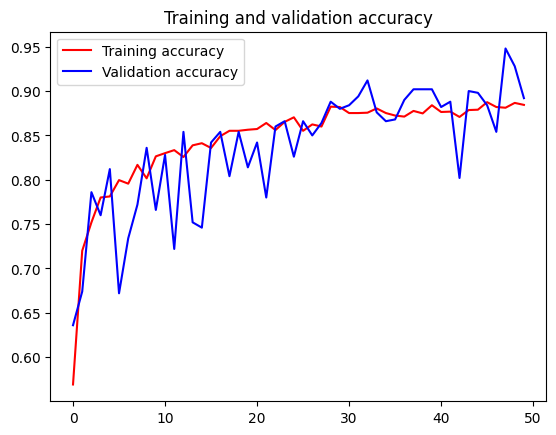

<Figure size 640x480 with 0 Axes>

In [15]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

## b. AlexNet

In [16]:
model2 = tf.keras.models.Sequential([
    Conv2D(filters=96, kernel_size=(11,11), activation='relu', strides=(4, 4), input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(filters=256, kernel_size=(5,5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.reset_states()

In [17]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 26, 26, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 384)      

In [18]:
model2.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [19]:
history2 = model2.fit(train_generator, steps_per_epoch=50, epochs=50, verbose=1, validation_data=test_generator, validation_steps=10, callbacks=[callbacks])

Epoch 1/50
50/50 [==============================] - 18s 280ms/step - loss: 0.6886 - accuracy: 0.5388 - val_loss: 0.7217 - val_accuracy: 0.4860
Epoch 2/50
50/50 [==============================] - 16s 315ms/step - loss: 0.6780 - accuracy: 0.5716 - val_loss: 0.7768 - val_accuracy: 0.4820
Epoch 3/50
50/50 [==============================] - 13s 264ms/step - loss: 0.6632 - accuracy: 0.6228 - val_loss: 0.6936 - val_accuracy: 0.5400
Epoch 4/50
50/50 [==============================] - 14s 270ms/step - loss: 0.5708 - accuracy: 0.7068 - val_loss: 0.5931 - val_accuracy: 0.6780
Epoch 5/50
50/50 [==============================] - 13s 261ms/step - loss: 0.4979 - accuracy: 0.7520 - val_loss: 0.5013 - val_accuracy: 0.7340
Epoch 6/50
50/50 [==============================] - 13s 264ms/step - loss: 0.4589 - accuracy: 0.7888 - val_loss: 0.4656 - val_accuracy: 0.7540
Epoch 7/50
50/50 [==============================] - 13s 263ms/step - loss: 0.4583 - accuracy: 0.7880 - val_loss: 0.4639 - val_accuracy: 0.7740

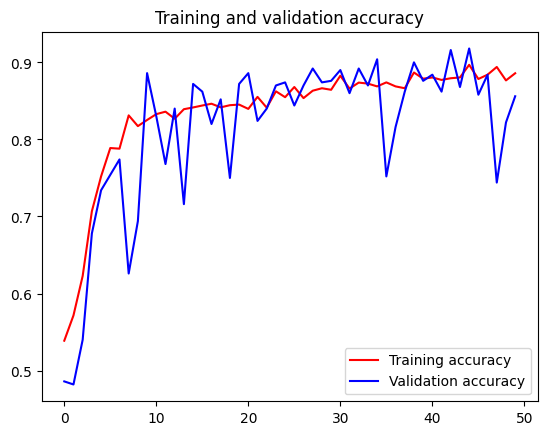

<Figure size 640x480 with 0 Axes>

In [20]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

## InceptionV3

In [60]:
model3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model3.reset_states()

In [61]:
model3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_188 (Conv2D)         (None, 111, 111, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_188 (B  (None, 111, 111, 32)         96        ['conv2d_188[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (None, 111, 111, 32)         0         ['batch_normalizati

In [62]:
for layer in model3.layers:
  layer.trainable = False

In [63]:
model3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_188 (Conv2D)         (None, 111, 111, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_188 (B  (None, 111, 111, 32)         96        ['conv2d_188[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (None, 111, 111, 32)         0         ['batch_normalizati

In [64]:
# define which layers of the model to get
last_desired_layer = model3.get_layer('mixed8')
print(last_desired_layer.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 1280), dtype=tf.float32, name=None), name='mixed8/concat:0', description="created by layer 'mixed8'")


In [15]:
x = Flatten()(last_desired_layer.output)
x = Dense(2024, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(1, activation='sigmoid') (x)

modelIV3M8 = Model(inputs=model3.inputs, outputs=x)

In [16]:
modelIV3M8.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [17]:
history3 = modelIV3M8.fit(train_generator, steps_per_epoch=50, epochs=50, verbose=1, validation_data=test_generator, validation_steps=10, callbacks=[callbacks])

Epoch 1/50
50/50 [==============================] - 763s 15s/step - loss: 0.8242 - accuracy: 0.7664 - val_loss: 0.4627 - val_accuracy: 0.7620
Epoch 2/50
50/50 [==============================] - 472s 9s/step - loss: 0.3709 - accuracy: 0.8366 - val_loss: 0.2615 - val_accuracy: 0.8860
Epoch 3/50
50/50 [==============================] - 391s 8s/step - loss: 0.3208 - accuracy: 0.8649 - val_loss: 0.2827 - val_accuracy: 0.8980
Epoch 4/50
50/50 [==============================] - 355s 7s/step - loss: 0.3073 - accuracy: 0.8720 - val_loss: 0.3275 - val_accuracy: 0.8660
Epoch 5/50
50/50 [==============================] - 394s 8s/step - loss: 0.2832 - accuracy: 0.8826 - val_loss: 0.3709 - val_accuracy: 0.8140
Epoch 6/50
50/50 [==============================] - 238s 5s/step - loss: 0.2775 - accuracy: 0.8820 - val_loss: 0.2412 - val_accuracy: 0.9040
Epoch 7/50
50/50 [==============================] - 165s 3s/step - loss: 0.2640 - accuracy: 0.8936 - val_loss: 0.2179 - val_accuracy: 0.9360
Epoch 8/50
5

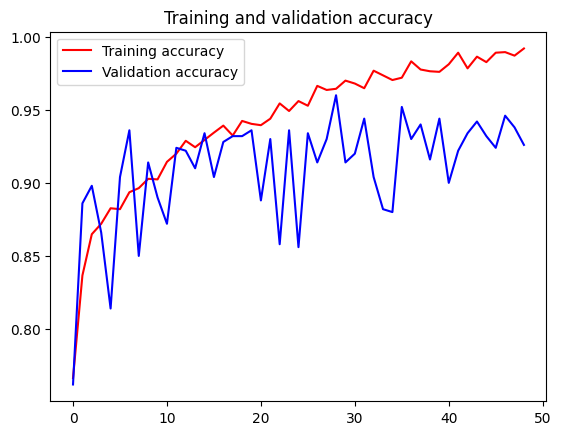

<Figure size 640x480 with 0 Axes>

In [18]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# Improving the Inception model

In [46]:
x2 = Flatten()(last_desired_layer.output)
x2 = Dense(2024, activation='relu')(x2)
x2 = Dense(1, activation='sigmoid') (x2)

modelIV3M8v2 = Model(inputs=model3.inputs, outputs=x2)

In [47]:
modelIV3M8v2.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [48]:
history3v2 = modelIV3M8v2.fit(train_generator, steps_per_epoch=50, epochs=50, verbose=1, validation_data=test_generator, validation_steps=20, callbacks=[callbacks])

Epoch 1/50
50/50 [==============================] - 27s 461ms/step - loss: 0.7461 - accuracy: 0.7728 - val_loss: 1.3348 - val_accuracy: 0.5840
Epoch 2/50
50/50 [==============================] - 16s 327ms/step - loss: 0.3629 - accuracy: 0.8448 - val_loss: 0.2701 - val_accuracy: 0.8870
Epoch 3/50
50/50 [==============================] - 17s 332ms/step - loss: 0.3415 - accuracy: 0.8560 - val_loss: 0.2872 - val_accuracy: 0.8940
Epoch 4/50
50/50 [==============================] - 16s 312ms/step - loss: 0.2987 - accuracy: 0.8696 - val_loss: 0.5060 - val_accuracy: 0.7090
Epoch 5/50
50/50 [==============================] - 16s 312ms/step - loss: 0.2676 - accuracy: 0.8836 - val_loss: 0.2239 - val_accuracy: 0.9150
Epoch 6/50
50/50 [==============================] - 17s 329ms/step - loss: 0.2806 - accuracy: 0.8816 - val_loss: 0.2684 - val_accuracy: 0.8850
Epoch 7/50
50/50 [==============================] - 16s 316ms/step - loss: 0.2548 - accuracy: 0.8908 - val_loss: 0.2178 - val_accuracy: 0.9230

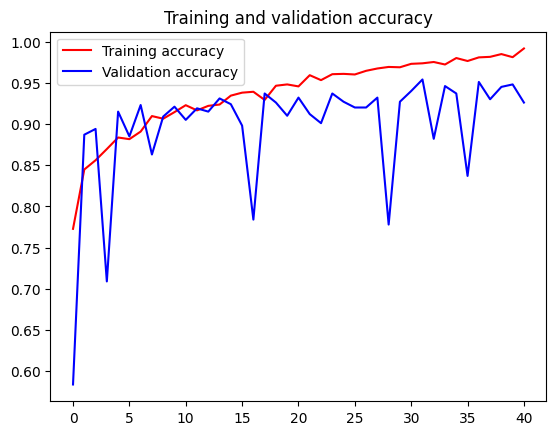

<Figure size 640x480 with 0 Axes>

In [49]:
acc = history3v2.history['accuracy']
val_acc = history3v2.history['val_accuracy']
loss = history3v2.history['loss']
val_loss = history3v2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [65]:
x3 = Flatten()(last_desired_layer.output)
x3 = Dense(2024, activation='relu')(x3)
x3 = Dense(512, activation='relu')(x3)
x3 = Dense(1, activation='sigmoid')(x3)

modelIV3M8v3 = Model(inputs=model3.inputs, outputs=x3)

In [58]:
modelIV3M8v3.reset_states()

In [66]:
modelIV3M8v3.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [67]:
history3v3 = modelIV3M8v3.fit(train_generator, steps_per_epoch=50, epochs=50, verbose=1, validation_data=test_generator, validation_steps=25, callbacks=[callbacks])

Epoch 1/50
50/50 [==============================] - 28s 461ms/step - loss: 0.7282 - accuracy: 0.7340 - val_loss: 0.8161 - val_accuracy: 0.6312
Epoch 2/50
50/50 [==============================] - 21s 421ms/step - loss: 0.3726 - accuracy: 0.8200 - val_loss: 0.4228 - val_accuracy: 0.8000
Epoch 3/50
50/50 [==============================] - 21s 416ms/step - loss: 0.3257 - accuracy: 0.8576 - val_loss: 0.3415 - val_accuracy: 0.8592
Epoch 4/50
50/50 [==============================] - 16s 323ms/step - loss: 0.2877 - accuracy: 0.8780 - val_loss: 0.2342 - val_accuracy: 0.9064
Epoch 5/50
50/50 [==============================] - 21s 431ms/step - loss: 0.2777 - accuracy: 0.8812 - val_loss: 0.3563 - val_accuracy: 0.8312
Epoch 6/50
50/50 [==============================] - 17s 329ms/step - loss: 0.2812 - accuracy: 0.8780 - val_loss: 0.3513 - val_accuracy: 0.8480
Epoch 7/50
50/50 [==============================] - 21s 430ms/step - loss: 0.2548 - accuracy: 0.8968 - val_loss: 0.2265 - val_accuracy: 0.9184

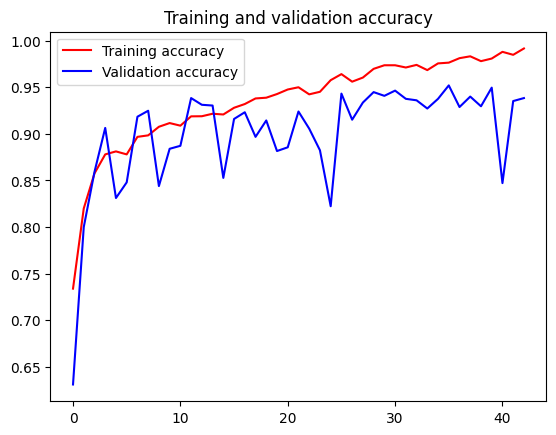

<Figure size 640x480 with 0 Axes>

In [68]:
acc = history3v3.history['accuracy']
val_acc = history3v3.history['val_accuracy']
loss = history3v3.history['loss']
val_loss = history3v3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [81]:
x4 = Flatten()(last_desired_layer.output)
x4 = Dense(2048, activation='relu')(x4)
x4 = Dropout(0.1)(x4)
x4 = Dense(128, activation='relu')(x4)
x4 = Dropout(0.1)(x4)
x4 = Dense(1, activation='sigmoid')(x4)

modelIV3M8v4 = Model(inputs=model3.inputs, outputs=x4)

In [82]:
modelIV3M8v4.reset_states()

In [83]:
modelIV3M8v4.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [84]:
history3v4 = modelIV3M8v4.fit(train_generator, steps_per_epoch=50, epochs=100, verbose=1, validation_data=test_generator, validation_steps=25, callbacks=[callbacks])

Epoch 1/100
50/50 [==============================] - 28s 448ms/step - loss: 0.5711 - accuracy: 0.7789 - val_loss: 0.3680 - val_accuracy: 0.8456
Epoch 2/100
50/50 [==============================] - 16s 320ms/step - loss: 0.3717 - accuracy: 0.8388 - val_loss: 0.3318 - val_accuracy: 0.8520
Epoch 3/100
50/50 [==============================] - 17s 333ms/step - loss: 0.3372 - accuracy: 0.8588 - val_loss: 0.3767 - val_accuracy: 0.8272
Epoch 4/100
50/50 [==============================] - 16s 325ms/step - loss: 0.3201 - accuracy: 0.8632 - val_loss: 0.2953 - val_accuracy: 0.8800
Epoch 5/100
50/50 [==============================] - 16s 317ms/step - loss: 0.3111 - accuracy: 0.8669 - val_loss: 0.2593 - val_accuracy: 0.9112
Epoch 6/100
50/50 [==============================] - 21s 426ms/step - loss: 0.2722 - accuracy: 0.8828 - val_loss: 0.3926 - val_accuracy: 0.8216
Epoch 7/100
50/50 [==============================] - 21s 426ms/step - loss: 0.2917 - accuracy: 0.8688 - val_loss: 0.2192 - val_accuracy:

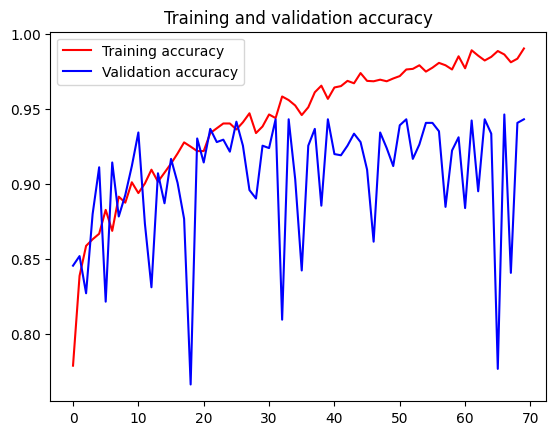

<Figure size 640x480 with 0 Axes>

In [86]:
acc = history3v4.history['accuracy']
val_acc = history3v4.history['val_accuracy']
loss = history3v4.history['loss']
val_loss = history3v4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# Test the accuracy of the models with your own images!

In [20]:
model = modelIV3M8

In [24]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(224, 224))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(np.round(classes[0],4))

  if classes[0]>0.5:
    print(fn + " shows a malignant malanoma")
  else:
    print(fn + " shows a benign melanoma")


Saving 5602.jpg to 5602 (2).jpg
1/1 [==============================] - 0s 23ms/step
[0.9982]
5602 (2).jpg shows a malignant malanoma
